In [390]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [385]:
selected = sorted([x for x in os.listdir("../") if x.startswith("log")])[-1]
selected

IndexError: list index out of range

In [420]:
selected = "edgeTPULog-zico_bc_edgetpu.tflite/"

In [421]:
file = f"../{selected}/ppk2_recording.json"
with open(file, "r") as f:
    data = json.load(f)

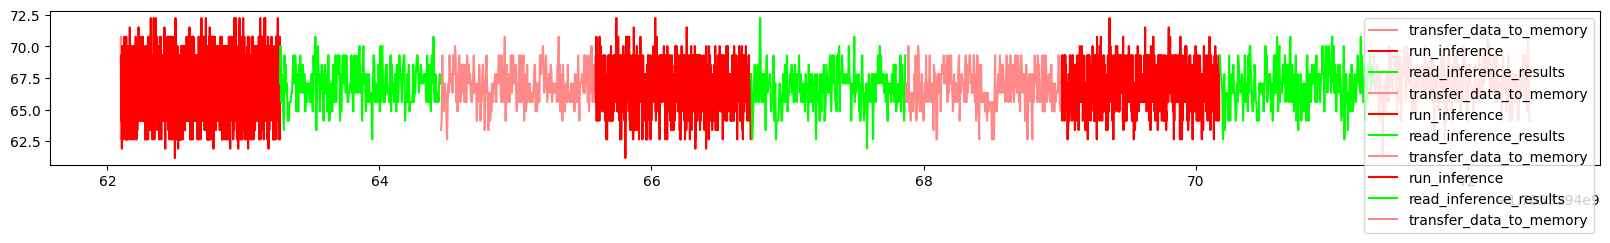

In [422]:
phase_colors = {"prepare_for_inference": "#A8A8A8",
                "generate_inference_code":"#FFD8D8",
                "deploy_model": "#00FFFF",
                "deploy_code":"#0000FF",
                "prepare_data": "#C8C8C8",
                "transfer_data_to_memory": "#FF8888",
                "run_inference": "#FF0000", 
                "read_inference_results": "#00FF00"}

figure = plt.figure(figsize=(20,2))
all_samples = []
last_time = data[0]["start_timestamp"]
for phase in data:
    
    samples = np.asarray(phase["samples"])/1000
    #samples = samples[samples<100]
    if len(samples)==0:
        continue
        
    t_in = last_time#phase["start_timestamp"]
    t_ou = phase["stop_timestamp"]
    delta = (t_ou-t_in)/len(samples)
    times = np.arange(last_time, t_ou, delta)[:len(samples)]
    last_time = t_ou
    
    plt.plot(times, samples, "-", markersize=2, label=phase["phase"], color=phase_colors[phase["phase"]])
plt.legend()
plt.show()

In [312]:
for phase in data:
    print(phase["phase"], np.mean(phase["samples"])/1000)

transfer_data_to_memory 47.742739267453864
run_inference 47.84929221152902
read_inference_results 47.83508583755774
transfer_data_to_memory 47.79753028836711
run_inference 47.75423499035968
read_inference_results 47.938886553307384
transfer_data_to_memory 47.736882899493
run_inference 47.850564652411975
read_inference_results 47.61002887908141
transfer_data_to_memory 47.29546708420308
run_inference 47.57245431589988
read_inference_results 47.64751749902414
transfer_data_to_memory 47.644586019285285
run_inference 47.57966956510144
read_inference_results 47.43681016610967
transfer_data_to_memory 47.843645517366895
run_inference 47.72679828292282
read_inference_results 47.95912043401675
transfer_data_to_memory 47.72827403682743
run_inference 47.629412510152356
read_inference_results 47.174373601238315
transfer_data_to_memory 47.68498076697903
run_inference 47.45205922416637
read_inference_results 47.74268957755769
transfer_data_to_memory 47.47724801218275
run_inference 47.63739409391256
r

In [269]:
data

[{'phase': 'deploy_model',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323404.7248719,
  'stop_timestamp': 1705323404.724915},
 {'phase': 'deploy_code',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323405.831202,
  'stop_timestamp': 1705323423.603169},
 {'phase': 'transfer_data_to_memory',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323424.7126532,
  'stop_timestamp': 1705323424.715372},
 {'phase': 'run_inference',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323425.849858,
  'stop_timestamp': 1705323425.9697878},
 {'phase': 'read_inference_results',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323427.084418,
  'stop_timestamp': 1705323427.0845451},
 {'phase': 'transfer_data_to_memory',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323428.194885,
  'stop_timestamp': 1705323428.194904},
 {'phase': 'run_inference',
  'samples': [],
  'digital': [],
  'start_timestamp': 1705323429.3361971,
  'stop_timesta

In [86]:
a[300000:]

[7248292.270343403,
 8903542.506026765,
 10694368.520325486,
 12620770.313239556,
 14682747.884768983,
 16880301.234913763,
 19213430.363673892,
 21682135.271049388,
 24286415.957040228,
 27026272.42164642,
 163882.20716566202,
 1005677.7711569007,
 1983049.1137634933,
 3095996.2349854405,
 4344519.134822739,
 5728617.813275394,
 7248292.270343403,
 8903542.506026765,
 10694368.520325486,
 12620770.313239556,
 14682747.884768983,
 16880301.234913763,
 19213430.363673892,
 21682135.271049388,
 24286415.957040228,
 27026272.42164642,
 163882.20716566202,
 1005677.7711569007,
 1983049.1137634933,
 3095996.2349854405,
 4344519.134822739,
 5728617.813275394,
 7248292.270343403,
 8903542.506026765,
 10694368.520325486,
 12620770.313239556,
 14682747.884768983,
 16880301.234913763,
 19213430.363673892,
 21682135.271049388,
 24286415.957040228,
 27026272.42164642,
 163882.20716566202,
 1005677.7711569007,
 1983049.1137634933,
 3095996.2349854405,
 4344519.134822739,
 5728617.813275394,
 724829